In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)


import matplotlib.pyplot as plt
import tabulate

# Importing Data

In [2]:
player_feats = pd.read_csv(
    r"C:\Users\Aspandiyar\Desktop\csgo_dataset-20221207T051720Z-001\csgo_dataset\players_feats.csv"
)
train = pd.read_csv(
    r"C:\Users\Aspandiyar\Desktop\csgo_dataset-20221207T051720Z-001\csgo_dataset\train.csv"
)

# Data Understanding

In [3]:
train.sort_values(by=["map_id"]).head(5)

,map_id,team1_id,team2_id,map_name,who_win
78,0,4869,11251,Vertigo,0
173,2,4869,5752,Ancient,1
294,3,10567,11595,Dust2,1
435,4,8297,4773,Vertigo,1
395,5,7020,4869,Mirage,1


In [4]:
player_feats.sort_values(by=["map_id"]).head(5)

,p1_id,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,p1_assists_per_round,p1_deaths_per_round,p1_saved_by_teammate_per_round,p1_saved_teammates_per_round,p1_rating,p1_kill_death,p1_kill_round,p1_rounds_with_kills,p1_kill_death_difference,p1_total_opening_kills,p1_total_opening_deaths,p1_opening_kill_ratio,p1_opening_kill_rating,p1_team_win_percent_after_first_kill,p1_first_kill_in_won_rounds,p2_id,p2_total_kills,p2_headshots,p2_total_deaths,p2_kd_ratio,p2_damage_per_round,p2_grenade_damage_per_round,p2_maps_played,p2_rounds_played,p2_kills_per_round,p2_assists_per_round,p2_deaths_per_round,p2_saved_by_teammate_per_round,p2_saved_teammates_per_round,p2_rating,p2_kill_death,p2_kill_round,p2_rounds_with_kills,p2_kill_death_difference,p2_total_opening_kills,p2_total_opening_deaths,p2_opening_kill_ratio,p2_opening_kill_rating,p2_team_win_percent_after_first_kill,p2_first_kill_in_won_rounds,p3_id,p3_total_kills,p3_headshots,p3_total_deaths,p3_kd_ratio,p3_damage_per_round,p3_grenade_damage_per_round,p3_maps_played,p3_rounds_played,p3_kills_per_round,p3_assists_per_round,p3_deaths_per_round,p3_saved_by_teammate_per_round,p3_saved_teammates_per_round,p3_rating,p3_kill_death,p3_kill_round,p3_rounds_with_kills,p3_kill_death_difference,p3_total_opening_kills,p3_total_opening_deaths,p3_opening_kill_ratio,p3_opening_kill_rating,p3_team_win_percent_after_first_kill,p3_first_kill_in_won_rounds,p4_id,p4_total_kills,p4_headshots,p4_total_deaths,p4_kd_ratio,p4_damage_per_round,p4_grenade_damage_per_round,p4_maps_played,p4_rounds_played,p4_kills_per_round,p4_assists_per_round,p4_deaths_per_round,p4_saved_by_teammate_per_round,p4_saved_teammates_per_round,p4_rating,p4_kill_death,p4_kill_round,p4_rounds_with_kills,p4_kill_death_difference,p4_total_opening_kills,p4_total_opening_deaths,p4_opening_kill_ratio,p4_opening_kill_rating,p4_team_win_percent_after_first_kill,p4_first_kill_in_won_rounds,p5_id,p5_total_kills,p5_headshots,p5_total_deaths,p5_kd_ratio,p5_damage_per_round,p5_grenade_damage_per_round,p5_maps_played,p5_rounds_played,p5_kills_per_round,p5_assists_per_round,p5_deaths_per_round,p5_saved_by_teammate_per_round,p5_saved_teammates_per_round,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds,team_id,map_name,map_id
1152,922,213,41.3,236,0.90,73.2,6.8,13,335,0.64,0.18,0.70,0.12,0.06,0.97,0.90,0.64,146,-23,34,49,0.69,0.93,67.6,12.9,11777,230,40.9,244,0.94,76.7,7.6,13,335,0.69,0.13,0.73,0.07,0.08,1.01,0.94,0.69,153,-14,48,49,0.98,1.14,72.9,19.7,16080,214,50.9,212,1.01,75.7,5.7,13,335,0.64,0.13,0.63,0.08,0.10,1.03,1.01,0.64,150,2,27,31,0.87,0.92,77.8,11.8,16848,233,35.2,212,1.10,74.2,3.2,13,335,0.70,0.13,0.63,0.09,0.08,1.07,1.10,0.70,158,21,32,18,1.78,1.05,84.4,15.2,18221,255,48.2,186,1.37,84.8,4.7,12,305,0.84,0.11,0.61,0.08,0.12,1.23,1.37,0.84,166,69,24,20,1.20,0.95,62.5,9.3,4869,Vertigo,0
1153,7938,581,48.2,469,1.24,93.1,11.2,26,716,0.81,0.20,0.66,0.11,0.15,1.34,1.22,0.83,295,80,91,55,1.65,1.35,70.3,23.8,8574,524,30.5,392,1.34,73.9,6.3,26,716,0.73,0.11,0.55,0.07,0.10,1.16,1.27,0.71,258,81,35,30,1.17,0.90,74.3,9.7,8575,458,57.9,412,1.11,73.8,6.1,24,650,0.70,0.12,0.63,0.13,0.08,1.10,1.02,0.67,203,6,49,61,0.80,0.97,67.3,13.9,15835,515,52.6,502,1.03,79.6,6.8,26,716,0.72,0.14,0.70,0.14,0.10,1.13,0.95,0.69,246,-20,67,62,1.08,1.10,65.7,16.4,19187,376,45.2,349,1.08,71.0,6.2,22,600,0.63,0.14,0.58,0.09,0.09,1.06,0.94,0.59,182,-17,33,25,1.32,0.94,84.8,12.2,11251,Vertigo,0
1424,12521,270,42.6,334,0.81,78.9,4.5,17,422,0.64,0.16,0.79,0.09,0.07,0.96,0.78,0.63,163,-69,61,78,0.78,1.12,62.3,22.4,12553,316,42.1,266,1.19,78.0,3.7,17,422,0.75,0.10,0.63,0.07,0.09,1.11,1.11,0.73,183,27,32,28,1.14,0.96,56.2,10.6,15631,299,40.1,270,1.11,79.3,3.2,17,422,0.71,0.13,0.64,0.07,0

# Data Wrangling and EDA

In [5]:
# Joining player data with train data
df = train.merge(
    player_feats.drop(columns=["map_name"]),
    left_on=["map_id", "team1_id"],
    right_on=["map_id", "team_id"],
).sort_values(by=["map_id"])
df = df.merge(
    player_feats.drop(columns=["map_name"]),
    left_on=["map_id", "team2_id"],
    right_on=["map_id", "team_id"],
    suffixes=("_team1", "_team2"),
).sort_values(by=["map_id"])
df.drop(columns=["team_id_team1", "team_id_team2"], inplace=True)

<AxesSubplot:>

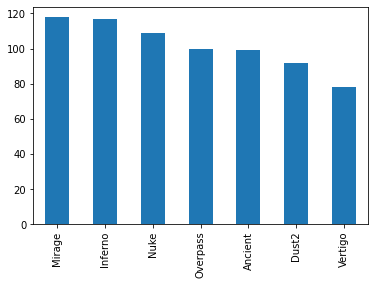

In [6]:
df.map_name.value_counts().plot(kind="bar")

In [7]:
# Converting map names to dummies
df = pd.get_dummies(df, columns=["map_name"])

In [8]:
df.loc[df["who_win"] == 0].describe()

,map_id,team1_id,team2_id,who_win,p1_id_team1,p1_total_kills_team1,p1_headshots_team1,p1_total_deaths_team1,p1_kd_ratio_team1,p1_damage_per_round_team1,p1_grenade_damage_per_round_team1,p1_maps_played_team1,p1_rounds_played_team1,p1_kills_per_round_team1,p1_assists_per_round_team1,p1_deaths_per_round_team1,p1_saved_by_teammate_per_round_team1,p1_saved_teammates_per_round_team1,p1_rating_team1,p1_kill_death_team1,p1_kill_round_team1,p1_rounds_with_kills_team1,p1_kill_death_difference_team1,p1_total_opening_kills_team1,p1_total_opening_deaths_team1,p1_opening_kill_ratio_team1,p1_opening_kill_rating_team1,p1_team_win_percent_after_first_kill_team1,p1_first_kill_in_won_rounds_team1,p2_id_team1,p2_total_kills_team1,p2_headshots_team1,p2_total_deaths_team1,p2_kd_ratio_team1,p2_damage_per_round_team1,p2_grenade_damage_per_round_team1,p2_maps_played_team1,p2_rounds_played_team1,p2_kills_per_round_team1,p2_assists_per_round_team1,p2_deaths_per_round_team1,p2_saved_by_teammate_per_round_team1,p2_saved_teammates_per_round_team1,p2_rating_team1,p2_kill_death_team1,p2_kill_round_team1,p2_rounds_with_kills_team1,p2_kill_death_difference_team1,p2_total_opening_kills_team1,p2_total_opening_deaths_team1,p2_opening_kill_ratio_team1,p2_opening_kill_rating_team1,p2_team_win_percent_after_first_kill_team1,p2_first_kill_in_won_rounds_team1,p3_id_team1,p3_total_kills_team1,p3_headshots_team1,p3_total_deaths_team1,p3_kd_ratio_team1,p3_damage_per_round_team1,p3_grenade_damage_per_round_team1,p3_maps_played_team1,p3_rounds_played_team1,p3_kills_per_round_team1,p3_assists_per_round_team1,p3_deaths_per_round_team1,p3_saved_by_teammate_per_round_team1,p3_saved_teammates_per_round_team1,p3_rating_team1,p3_kill_death_team1,p3_kill_round_team1,p3_rounds_with_kills_team1,p3_kill_death_difference_team1,p3_total_opening_kills_team1,p3_total_opening_deaths_team1,p3_opening_kill_ratio_team1,p3_opening_kill_rating_team1,p3_team_win_percent_after_first_kill_team1,p3_first_kill_in_won_rounds_team1,p4_id_team1,p4_total_kills_team1,p4_headshots_team1,p4_total_deaths_team1,p4_kd_ratio_team1,p4_damage_per_round_team1,p4_grenade_damage_per_round_team1,p4_maps_played_team1,p4_rounds_played_team1,p4_kills_per_round_team1,p4_assists_per_round_team1,p4_deaths_per_round_team1,p4_saved_by_teammate_per_round_team1,p4_saved_teammates_per_round_team1,p4_rating_team1,p4_kill_death_team1,p4_kill_round_team1,p4_rounds_with_kills_team1,p4_kill_death_difference_team1,p4_total_opening_kills_team1,p4_total_opening_deaths_team1,p4_opening_kill_ratio_team1,p4_opening_kill_rating_team1,p4_team_win_percent_after_first_kill_team1,p4_first_kill_in_won_rounds_team1,p5_id_team1,p5_total_kills_team1,p5_headshots_team1,p5_total_deaths_team1,p5_kd_ratio_team1,p5_damage_per_round_team1,p5_grenade_damage_per_round_team1,p5_maps_played_team1,p5_rounds_played_team1,p5_kills_per_round_team1,p5_assists_per_round_team1,p5_deaths_per_round_team1,p5_saved_by_teammate_per_round_team1,p5_saved_teammates_per_round_team1,p5_rating_team1,p5_kill_death_team1,p5_kill_round_team1,p5_rounds_with_kills_team1,p5_kill_death_difference_team1,p5_total_opening_kills_team1,p5_total_opening_deaths_team1,p5_opening_kill_ratio_team1,p5_opening_kill_rating_team1,p5_team_win_percent_after_first_kill_team1,p5_first_kill_in_won_rounds_team1,p1_id_team2,p1_total_kills_team2,p1_headshots_team2,p1_total_deaths_team2,p1_kd_ratio_team2,p1_damage_per_round_team2,p1_grenade_damage_per_round_team2,p1_maps_played_team2,p1_rounds_played_team2,p1_kills_per_round_team2,p1_assists_per_round_team2,p1_deaths_per_round_team2,p1_saved_by_teammate_per_round_team2,p1_saved_teammates_per_round_team2,p1_rating_team2,p1_kill_death_team2,p1_kill_round_team2,p1_rounds_with_kills_team2,p1_kill_death_difference_team2,p1_total_opening_kills_team2,p1_total_opening_deaths_team2,p1_opening_kill_ratio_team2,p1_opening_kill_rating_team2,p1_team_win_percent_after_first_kill_team2,p1_first_kill_in_won_rounds_team2,p2_id_team2,p2_total_kills_team2,p2_headshots_te

In [9]:
df.loc[df["who_win"] == 1].describe()

,map_id,team1_id,team2_id,who_win,p1_id_team1,p1_total_kills_team1,p1_headshots_team1,p1_total_deaths_team1,p1_kd_ratio_team1,p1_damage_per_round_team1,p1_grenade_damage_per_round_team1,p1_maps_played_team1,p1_rounds_played_team1,p1_kills_per_round_team1,p1_assists_per_round_team1,p1_deaths_per_round_team1,p1_saved_by_teammate_per_round_team1,p1_saved_teammates_per_round_team1,p1_rating_team1,p1_kill_death_team1,p1_kill_round_team1,p1_rounds_with_kills_team1,p1_kill_death_difference_team1,p1_total_opening_kills_team1,p1_total_opening_deaths_team1,p1_opening_kill_ratio_team1,p1_opening_kill_rating_team1,p1_team_win_percent_after_first_kill_team1,p1_first_kill_in_won_rounds_team1,p2_id_team1,p2_total_kills_team1,p2_headshots_team1,p2_total_deaths_team1,p2_kd_ratio_team1,p2_damage_per_round_team1,p2_grenade_damage_per_round_team1,p2_maps_played_team1,p2_rounds_played_team1,p2_kills_per_round_team1,p2_assists_per_round_team1,p2_deaths_per_round_team1,p2_saved_by_teammate_per_round_team1,p2_saved_teammates_per_round_team1,p2_rating_team1,p2_kill_death_team1,p2_kill_round_team1,p2_rounds_with_kills_team1,p2_kill_death_difference_team1,p2_total_opening_kills_team1,p2_total_opening_deaths_team1,p2_opening_kill_ratio_team1,p2_opening_kill_rating_team1,p2_team_win_percent_after_first_kill_team1,p2_first_kill_in_won_rounds_team1,p3_id_team1,p3_total_kills_team1,p3_headshots_team1,p3_total_deaths_team1,p3_kd_ratio_team1,p3_damage_per_round_team1,p3_grenade_damage_per_round_team1,p3_maps_played_team1,p3_rounds_played_team1,p3_kills_per_round_team1,p3_assists_per_round_team1,p3_deaths_per_round_team1,p3_saved_by_teammate_per_round_team1,p3_saved_teammates_per_round_team1,p3_rating_team1,p3_kill_death_team1,p3_kill_round_team1,p3_rounds_with_kills_team1,p3_kill_death_difference_team1,p3_total_opening_kills_team1,p3_total_opening_deaths_team1,p3_opening_kill_ratio_team1,p3_opening_kill_rating_team1,p3_team_win_percent_after_first_kill_team1,p3_first_kill_in_won_rounds_team1,p4_id_team1,p4_total_kills_team1,p4_headshots_team1,p4_total_deaths_team1,p4_kd_ratio_team1,p4_damage_per_round_team1,p4_grenade_damage_per_round_team1,p4_maps_played_team1,p4_rounds_played_team1,p4_kills_per_round_team1,p4_assists_per_round_team1,p4_deaths_per_round_team1,p4_saved_by_teammate_per_round_team1,p4_saved_teammates_per_round_team1,p4_rating_team1,p4_kill_death_team1,p4_kill_round_team1,p4_rounds_with_kills_team1,p4_kill_death_difference_team1,p4_total_opening_kills_team1,p4_total_opening_deaths_team1,p4_opening_kill_ratio_team1,p4_opening_kill_rating_team1,p4_team_win_percent_after_first_kill_team1,p4_first_kill_in_won_rounds_team1,p5_id_team1,p5_total_kills_team1,p5_headshots_team1,p5_total_deaths_team1,p5_kd_ratio_team1,p5_damage_per_round_team1,p5_grenade_damage_per_round_team1,p5_maps_played_team1,p5_rounds_played_team1,p5_kills_per_round_team1,p5_assists_per_round_team1,p5_deaths_per_round_team1,p5_saved_by_teammate_per_round_team1,p5_saved_teammates_per_round_team1,p5_rating_team1,p5_kill_death_team1,p5_kill_round_team1,p5_rounds_with_kills_team1,p5_kill_death_difference_team1,p5_total_opening_kills_team1,p5_total_opening_deaths_team1,p5_opening_kill_ratio_team1,p5_opening_kill_rating_team1,p5_team_win_percent_after_first_kill_team1,p5_first_kill_in_won_rounds_team1,p1_id_team2,p1_total_kills_team2,p1_headshots_team2,p1_total_deaths_team2,p1_kd_ratio_team2,p1_damage_per_round_team2,p1_grenade_damage_per_round_team2,p1_maps_played_team2,p1_rounds_played_team2,p1_kills_per_round_team2,p1_assists_per_round_team2,p1_deaths_per_round_team2,p1_saved_by_teammate_per_round_team2,p1_saved_teammates_per_round_team2,p1_rating_team2,p1_kill_death_team2,p1_kill_round_team2,p1_rounds_with_kills_team2,p1_kill_death_difference_team2,p1_total_opening_kills_team2,p1_total_opening_deaths_team2,p1_opening_kill_ratio_team2,p1_opening_kill_rating_team2,p1_team_win_percent_after_first_kill_team2,p1_first_kill_in_won_rounds_team2,p2_id_team2,p2_total_kills_team2,p2_headshots_te

# Data Aggregation

In [10]:
features = [
    "total_kills",
    "headshots",
    "total_deaths",
    "kd_ratio",
    "damage_per_round",
    "grenade_damage_per_round",
    "maps_played",
    "rounds_played",
    "kills_per_round",
    "assists_per_round",
    "deaths_per_round",
    "saved_by_teammate_per_round",
    "saved_teammates_per_round",
    "rating",
    "kill_death",
    "kill_round",
    "rounds_with_kills",
    "kill_death_difference",
    "total_opening_kills",
    "total_opening_deaths",
    "opening_kill_ratio",
    "opening_kill_rating",
    "team_win_percent_after_first_kill",
    "first_kill_in_won_rounds",
]

features_t1 = [
    "total_kills_team1",
    "headshots_team1",
    "total_deaths_team1",
    "kd_ratio_team1",
    "damage_per_round_team1",
    "grenade_damage_per_round_team1",
    "maps_played_team1",
    "rounds_played_team1",
    "kills_per_round_team1",
    "assists_per_round_team1",
    "deaths_per_round_team1",
    "saved_by_teammate_per_round_team1",
    "saved_teammates_per_round_team1",
    "rating_team1",
    "kill_death_team1",
    "kill_round_team1",
    "rounds_with_kills_team1",
    "kill_death_difference_team1",
    "total_opening_kills_team1",
    "total_opening_deaths_team1",
    "opening_kill_ratio_team1",
    "opening_kill_rating_team1",
    "team_win_percent_after_first_kill_team1",
    "first_kill_in_won_rounds_team1",
]
features_t2 = [
    "total_kills_team2",
    "headshots_team2",
    "total_deaths_team2",
    "kd_ratio_team2",
    "damage_per_round_team2",
    "grenade_damage_per_round_team2",
    "maps_played_team2",
    "rounds_played_team2",
    "kills_per_round_team2",
    "assists_per_round_team2",
    "deaths_per_round_team2",
    "saved_by_teammate_per_round_team2",
    "saved_teammates_per_round_team2",
    "rating_team2",
    "kill_death_team2",
    "kill_round_team2",
    "rounds_with_kills_team2",
    "kill_death_difference_team2",
    "total_opening_kills_team2",
    "total_opening_deaths_team2",
    "opening_kill_ratio_team2",
    "opening_kill_rating_team2",
    "team_win_percent_after_first_kill_team2",
    "first_kill_in_won_rounds_team2",
]
players = ["p1_", "p2_", "p3_", "p4_", "p5_"]

for i in range(len(features)):
    print(i, features[i])

# Aggregating stats of each player and calculating the team average stats
for f in range(len(features_t1)):
    col0 = players[0] + features_t1[f]
    col1 = players[1] + features_t1[f]
    col2 = players[2] + features_t1[f]
    col3 = players[3] + features_t1[f]
    col4 = players[4] + features_t1[f]
    df[f"{features_t1[f]}"] = (
        df[f"{col0}"] + df[f"{col1}"] + df[f"{col2}"] + df[f"{col3}"] + df[f"{col4}"]
    ) // 5

    col0 = players[0] + features_t2[f]
    col1 = players[1] + features_t2[f]
    col2 = players[2] + features_t2[f]
    col3 = players[3] + features_t2[f]
    col4 = players[4] + features_t2[f]
    df[f"{features_t2[f]}"] = (
        df[f"{col0}"] + df[f"{col1}"] + df[f"{col2}"] + df[f"{col3}"] + df[f"{col4}"]
    ) // 5

    # Calculating differences of teams' stats
    df[f"diff_{features[f]}"] = df[f"{features_t1[f]}"] - df[f"{features_t2[f]}"]


df["KAST_team1"] = 0
df["KAST_team2"] = 0


# Calculating KAST metrics for a team
for p in range(len(players)):
    df["KAST_team1"] += (
        df[f"{players[p] + features_t1[8]}"]
        + df[f"{players[p] + features_t1[9]}"]
        + df[f"{players[p] + features_t1[12]}"]
        + df[f"{players[p] + features_t1[14]}"]
    )
    df["KAST_team2"] += (
        df[f"{players[p] + features_t2[8]}"]
        + df[f"{players[p] + features_t2[9]}"]
        + df[f"{players[p] + features_t2[12]}"]
        + df[f"{players[p] + features_t2[14]}"]
    )


df["diff_KAST"] = df["KAST_team1"] - df["KAST_team2"]


# df['diff_pos_stats_score_cnt'] = df[df_col][df[df_col]>0].count(axis=1) - df[df_col][df[df_col]<0].count(axis=1)
df_col = [col for col in df if col.startswith("diff_")]

#### NORMALIZATION

from sklearn import preprocessing

nscaler = preprocessing.MinMaxScaler()

df[df_col] = nscaler.fit_transform(df[df_col])
df.fillna(0, inplace=True)

0 total_kills
1 headshots
2 total_deaths
3 kd_ratio
4 damage_per_round
5 grenade_damage_per_round
6 maps_played
7 rounds_played
8 kills_per_round
9 assists_per_round
10 deaths_per_round
11 saved_by_teammate_per_round
12 saved_teammates_per_round
13 rating
14 kill_death
15 kill_round
16 rounds_with_kills
17 kill_death_difference
18 total_opening_kills
19 total_opening_deaths
20 opening_kill_ratio
21 opening_kill_rating
22 team_win_percent_after_first_kill
23 first_kill_in_won_rounds


In [11]:
### Train Test Split
from sklearn.model_selection import train_test_split

# df.fillna(0, inplace=True) # replacing NaN with zero
# df_col = [col for col in df if col.startswith('diff_')]

# X = df.drop(columns = ['who_win', 'map_id', 'team1_id', 'team2_id'], axis=1)
X = df[df_col]

Y = df["who_win"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.40, random_state=1337
)
print("Train samples", len(X_train), "Test samples", len(X_test))

Train samples 427 Test samples 286


# Modeling

In [12]:
# LOGISTIC REGRESSION

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


lrmodel = LogisticRegression(penalty="l2")
lrmodel.fit(X_train, Y_train)
Y_train_pred = lrmodel.predict(X_train)
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)

acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)

Y_test_pred = lrmodel.predict(X_test)
cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)

accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)

Confusion Matrix Training:
 [[175  52]
 [114  86]]
Accurray Training: 0.6112412177985949
Confusion Matrix Testing:
 [[124  35]
 [ 72  55]]
Accurray Test: 0.6258741258741258


In [14]:
from sklearn.linear_model import LogisticRegression

lrmodel.fit(X_train, Y_train)
importances = pd.DataFrame(
    data={"Attribute": X_train.columns, "Importance": lrmodel.coef_[0]}
)
importances = importances.sort_values(by="Importance", ascending=False)

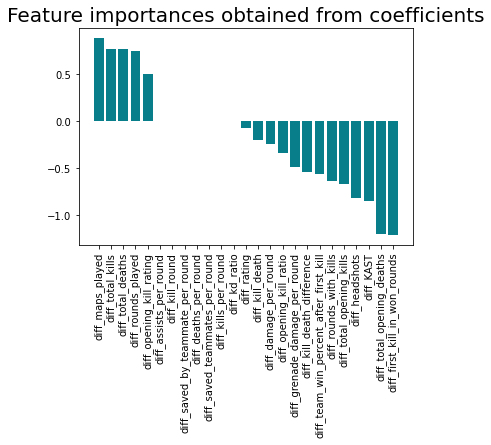

In [15]:
plt.bar(x=importances["Attribute"], height=importances["Importance"], color="#087E8B")
plt.title("Feature importances obtained from coefficients", size=20)
plt.xticks(rotation="vertical")
plt.show()

In [16]:
hf = importances.loc[abs(importances["Importance"]) >= 0.2].Attribute.to_list()

In [17]:
# SUPPORT VECTOR MACHINES

In [18]:
from sklearn.svm import SVC

LinSVCmodel = SVC(kernel="linear", C=8, random_state=43)
LinSVCmodel.fit(X_train, Y_train)
Y_train_pred = LinSVCmodel.predict(X_train)
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)

acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)

Y_test_pred = LinSVCmodel.predict(X_test)
51
cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)

accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)

Confusion Matrix Training:
 [[160  67]
 [ 91 109]]
Accurray Training: 0.629976580796253
Confusion Matrix Testing:
 [[117  42]
 [ 59  68]]
Accurray Test: 0.6468531468531469


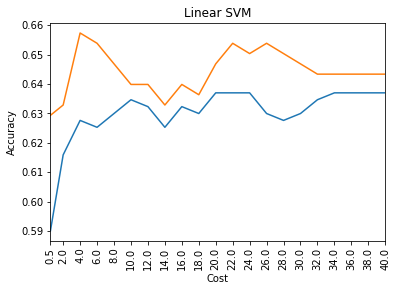

In [19]:
accuracies = np.zeros((3, 21), float)
costs = np.linspace(0, 40, 21)
costs[0] = 0.5
for k in range(0, 21):
    LinSVCmodel = SVC(kernel="linear", C=costs[k], random_state=0)
    LinSVCmodel.fit(X_train, Y_train)
    Y_train_pred = LinSVCmodel.predict(X_train)
    acctr = accuracy_score(Y_train, Y_train_pred)
    accuracies[1, k] = acctr
    Y_test_pred = LinSVCmodel.predict(X_test)
    accte = accuracy_score(Y_test, Y_test_pred)
    accuracies[2, k] = accte
    accuracies[0, k] = costs[k]
plt.plot(costs, accuracies[1, :])
plt.plot(costs, accuracies[2, :])
plt.xlim(1, 20)
plt.xticks(costs, rotation=90)
plt.xlabel("Cost")
plt.ylabel("Accuracy")
plt.title("Linear SVM")
plt.show()

In [20]:
from sklearn.svm import SVC

LinSVCmodel = SVC(kernel="linear", C=10, random_state=43)
LinSVCmodel.fit(X_train, Y_train)
Y_train_pred = LinSVCmodel.predict(X_train)
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)

acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)

Y_test_pred = LinSVCmodel.predict(X_test)
51
cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)

accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)

Confusion Matrix Training:
 [[161  66]
 [ 90 110]]
Accurray Training: 0.6346604215456675
Confusion Matrix Testing:
 [[116  43]
 [ 60  67]]
Accurray Test: 0.6398601398601399


In [21]:
# RANDOM FOREST CLASSIFIER

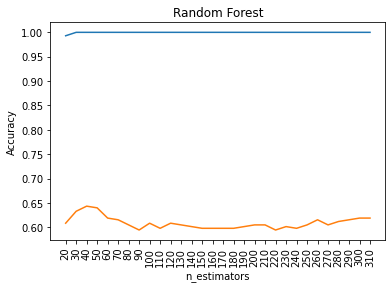

In [22]:
from sklearn.ensemble import RandomForestClassifier

accuracies = np.zeros((2, 30), float)
ntrees = (np.arange(30) + 2) * 10
for k in range(0, 30):
    rfmodel = RandomForestClassifier(random_state=0, n_estimators=ntrees[k])
    rfmodel.fit(X_train, Y_train)
    Y_train_pred = rfmodel.predict(X_train)
    acctr = accuracy_score(Y_train, Y_train_pred)
    accuracies[0, k] = acctr
    Y_test_pred = rfmodel.predict(X_test)
    accte = accuracy_score(Y_test, Y_test_pred)
    accuracies[1, k] = accte
plt.plot(ntrees, accuracies[0, :])
plt.plot(ntrees, accuracies[1, :])
plt.xticks(ntrees, rotation=90)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest")
plt.show()

In [23]:
mdepth = np.linspace(3, 10, 8)
accuracies = np.zeros((4, 5 * 20), float)
row = 0
for k in range(0, 5):
    for l in range(0, 20):
        rfmodel = RandomForestClassifier(
            random_state=1337,
            max_depth=mdepth[k],
            n_estimators=ntrees[l],
            min_samples_leaf=30,
            min_samples_split=20,
            max_features="auto",
        )
        rfmodel.fit(X_train, Y_train)
        Y_train_pred = rfmodel.predict(X_train)
        acctr = accuracy_score(Y_train, Y_train_pred)
        accuracies[2, row] = acctr
        Y_test_pred = rfmodel.predict(X_test)
        accte = accuracy_score(Y_test, Y_test_pred)
        accuracies[3, row] = accte
        accuracies[0, row] = mdepth[k]
        accuracies[1, row] = ntrees[l]
        row = row + 1

In [24]:
from tabulate import tabulate

headers = ["Max_Depth", "n_Estimators", "acctr", "accte"]
table = tabulate(accuracies.transpose(), headers, tablefmt="plain", floatfmt=".3f")
print("\n", table)


   Max_Depth    n_Estimators    acctr    accte
      3.000          20.000    0.656    0.615
      3.000          30.000    0.646    0.608
      3.000          40.000    0.660    0.608
      3.000          50.000    0.663    0.626
      3.000          60.000    0.665    0.622
      3.000          70.000    0.665    0.636
      3.000          80.000    0.674    0.615
      3.000          90.000    0.686    0.626
      3.000         100.000    0.677    0.622
      3.000         110.000    0.684    0.629
      3.000         120.000    0.681    0.629
      3.000         130.000    0.681    0.629
      3.000         140.000    0.684    0.626
      3.000         150.000    0.677    0.633
      3.000         160.000    0.677    0.647
      3.000         170.000    0.674    0.640
      3.000         180.000    0.667    0.643
      3.000         190.000    0.670    0.640
      3.000         200.000    0.663    0.640
      3.000         210.000    0.670    0.640
      4.000          20.000    0

In [25]:
print(accuracies[3].max())
maxi = np.array(np.where(accuracies == accuracies[3].max()))
table = tabulate(
    accuracies[:, maxi[1, :]].transpose(), headers, tablefmt="plain", floatfmt=".3f"
)
print("\n", table)

0.6468531468531469

   Max_Depth    n_Estimators    acctr    accte
      3.000         160.000    0.677    0.647
      4.000         110.000    0.681    0.647
      4.000         120.000    0.689    0.647
      4.000         130.000    0.686    0.647
      4.000         140.000    0.693    0.647
      5.000         140.000    0.698    0.647


In [26]:
rfmodel_main = RandomForestClassifier(
    random_state=1337,
    max_depth=3,
    n_estimators=160,
    min_samples_leaf=30,
    min_samples_split=20,
    max_features="auto",
)
rfmodel_main.fit(X, Y)
Y_pred = rfmodel_main.predict(X)
cmtr = confusion_matrix(Y, Y_pred)
print("Confusion Matrix Training:\n", cmtr)

acctr = accuracy_score(Y, Y_pred)
print("Accurray Training:", acctr)

Confusion Matrix Training:
 [[316  70]
 [166 161]]
Accurray Training: 0.6690042075736325


# Conclusion

In [27]:
from sklearn.svm import SVC

LinSVCmodel_main = SVC(kernel="linear", C=10, random_state=43)
LinSVCmodel_main.fit(X, Y)
Y_pred = LinSVCmodel_main.predict(X)
cmtr = confusion_matrix(Y, Y_pred)
print("Confusion Matrix Training:\n", cmtr)

acctr = accuracy_score(Y, Y_pred)
print("Accurray Training:", acctr)

Confusion Matrix Training:
 [[307  79]
 [164 163]]
Accurray Training: 0.6591865357643759


# Predicting the Test Data

In [28]:
test = pd.read_csv(
    r"C:\Users\Aspandiyar\Desktop\csgo_dataset-20221207T051720Z-001\csgo_dataset\test.csv"
)

df_ = test.merge(
    player_feats.drop(columns=["map_name"]),
    left_on=["map_id", "team1_id"],
    right_on=["map_id", "team_id"],
)
df_ = df_.merge(
    player_feats.drop(columns=["map_name"]),
    left_on=["map_id", "team2_id"],
    right_on=["map_id", "team_id"],
    suffixes=("_team1", "_team2"),
)
df_.drop(columns=["team_id_team1", "team_id_team2"], inplace=True)

df_ = pd.get_dummies(df_, columns=["map_name"])

features = [
    "total_kills",
    "headshots",
    "total_deaths",
    "kd_ratio",
    "damage_per_round",
    "grenade_damage_per_round",
    "maps_played",
    "rounds_played",
    "kills_per_round",
    "assists_per_round",
    "deaths_per_round",
    "saved_by_teammate_per_round",
    "saved_teammates_per_round",
    "rating",
    "kill_death",
    "kill_round",
    "rounds_with_kills",
    "kill_death_difference",
    "total_opening_kills",
    "total_opening_deaths",
    "opening_kill_ratio",
    "opening_kill_rating",
    "team_win_percent_after_first_kill",
    "first_kill_in_won_rounds",
]

features_t1 = [
    "total_kills_team1",
    "headshots_team1",
    "total_deaths_team1",
    "kd_ratio_team1",
    "damage_per_round_team1",
    "grenade_damage_per_round_team1",
    "maps_played_team1",
    "rounds_played_team1",
    "kills_per_round_team1",
    "assists_per_round_team1",
    "deaths_per_round_team1",
    "saved_by_teammate_per_round_team1",
    "saved_teammates_per_round_team1",
    "rating_team1",
    "kill_death_team1",
    "kill_round_team1",
    "rounds_with_kills_team1",
    "kill_death_difference_team1",
    "total_opening_kills_team1",
    "total_opening_deaths_team1",
    "opening_kill_ratio_team1",
    "opening_kill_rating_team1",
    "team_win_percent_after_first_kill_team1",
    "first_kill_in_won_rounds_team1",
]
features_t2 = [
    "total_kills_team2",
    "headshots_team2",
    "total_deaths_team2",
    "kd_ratio_team2",
    "damage_per_round_team2",
    "grenade_damage_per_round_team2",
    "maps_played_team2",
    "rounds_played_team2",
    "kills_per_round_team2",
    "assists_per_round_team2",
    "deaths_per_round_team2",
    "saved_by_teammate_per_round_team2",
    "saved_teammates_per_round_team2",
    "rating_team2",
    "kill_death_team2",
    "kill_round_team2",
    "rounds_with_kills_team2",
    "kill_death_difference_team2",
    "total_opening_kills_team2",
    "total_opening_deaths_team2",
    "opening_kill_ratio_team2",
    "opening_kill_rating_team2",
    "team_win_percent_after_first_kill_team2",
    "first_kill_in_won_rounds_team2",
]
players = ["p1_", "p2_", "p3_", "p4_", "p5_"]

for i in range(len(features)):
    print(i, features[i])

# Aggregating stats of each player and calculating the team average stats
for f in range(len(features_t1)):
    col0 = players[0] + features_t1[f]
    col1 = players[1] + features_t1[f]
    col2 = players[2] + features_t1[f]
    col3 = players[3] + features_t1[f]
    col4 = players[4] + features_t1[f]
    df_[f"{features_t1[f]}"] = (
        df_[f"{col0}"]
        + df_[f"{col1}"]
        + df_[f"{col2}"]
        + df_[f"{col3}"]
        + df_[f"{col4}"]
    ) // 5

    col0 = players[0] + features_t2[f]
    col1 = players[1] + features_t2[f]
    col2 = players[2] + features_t2[f]
    col3 = players[3] + features_t2[f]
    col4 = players[4] + features_t2[f]
    df_[f"{features_t2[f]}"] = (
        df_[f"{col0}"]
        + df_[f"{col1}"]
        + df_[f"{col2}"]
        + df_[f"{col3}"]
        + df_[f"{col4}"]
    ) // 5

    # Calculating differences of teams' stats
    df_[f"diff_{features[f]}"] = df_[f"{features_t1[f]}"] - df_[f"{features_t2[f]}"]


df_["KAST_team1"] = 0
df_["KAST_team2"] = 0


# Calculating KAST metrics for a team
for p in range(len(players)):
    df_["KAST_team1"] += (
        df_[f"{players[p] + features_t1[8]}"]
        + df_[f"{players[p] + features_t1[9]}"]
        + df_[f"{players[p] + features_t1[12]}"]
        + df_[f"{players[p] + features_t1[14]}"]
    )
    df_["KAST_team2"] += (
        df_[f"{players[p] + features_t2[8]}"]
        + df_[f"{players[p] + features_t2[9]}"]
        + df_[f"{players[p] + features_t2[12]}"]
        + df_[f"{players[p] + features_t2[14]}"]
    )


df_["diff_KAST"] = df_["KAST_team1"] - df_["KAST_team2"]


# df_['diff_pos_stats_score_cnt'] = df_[df__col][df_[df__col]>0].count(axis=1) - df_[df__col][df_[df__col]<0].count(axis=1)
df__col = [col for col in df_ if col.startswith("diff_")]

#### NORMALIZATION

from sklearn import preprocessing

nscaler = preprocessing.MinMaxScaler()

df_[df__col] = nscaler.fit_transform(df_[df__col])
df_.fillna(0, inplace=True)

X_test_pred = df_[df_col]

0 total_kills
1 headshots
2 total_deaths
3 kd_ratio
4 damage_per_round
5 grenade_damage_per_round
6 maps_played
7 rounds_played
8 kills_per_round
9 assists_per_round
10 deaths_per_round
11 saved_by_teammate_per_round
12 saved_teammates_per_round
13 rating
14 kill_death
15 kill_round
16 rounds_with_kills
17 kill_death_difference
18 total_opening_kills
19 total_opening_deaths
20 opening_kill_ratio
21 opening_kill_rating
22 team_win_percent_after_first_kill
23 first_kill_in_won_rounds


In [29]:
Y_test_pred = LinSVCmodel_main.predict(X_test_pred)

Y_test_pred = pd.DataFrame(Y_test_pred)

test_df = pd.merge(test, Y_test_pred, left_index=True, right_index=True)
test_df = test_df.rename(columns={test_df.columns[5]: "who_win_pred"})

test_df.to_csv(
    r"C:\Users\Aspandiyar\Desktop\csgo_dataset-20221207T051720Z-001\predictions\test_SVM.csv"
)

In [30]:
Y_test_pred = rfmodel_main.predict(X_test_pred)

Y_test_pred = pd.DataFrame(Y_test_pred)

test_df = pd.merge(test, Y_test_pred, left_index=True, right_index=True)
test_df = test_df.rename(columns={test_df.columns[5]: "who_win_pred"})

test_df.to_csv(
    r"C:\Users\Aspandiyar\Desktop\csgo_dataset-20221207T051720Z-001\predictions\test_RF.csv"
)